# Tugas Pemrograman Kecil 2

Author: Jaycent Gunawan Ongris (jaycent.gunawan@ui.ac.id)

Pada tugas ini, Anda akan belajar bagaimana membangun model *neural network from scratch* dengan menggunakan *library* PyTorch. Anda akan bekerja langsung dengan perkalian matriks pada proses *fitting* dan *predicting* menggunakan neural network, tanpa menggunakan abstraksi *layer* pada PyTorch sama sekali.

## Tutorial

Pada tutorial ini, Anda akan diberikan sebuah contoh membuat model regresi linear sederhana (*single-layer neural network*) dengan menggunakan PyTorch.

Fungsi yang akan digunakan sebagai patokan dalam membuat model adalah berikut ini. Koefisien-koefisien dari fungsi berikut akan diprediksi oleh model.

$$f(a,b,c)=0.5a+0.3b-0.8c+0.5$$

In [ ]:
import torch

import random



# WARNING: DO NOT CHANGE; FOR REPRODUCIBILITY

torch.manual_seed(0)

: 

In [119]:
def f(a, b, c):

  return 0.5*a + 0.3*b - 0.8*c + 0.5

In [120]:
# generate train dataset

X_train = torch.rand(100, 3)

X_train[:10]

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000],
        [0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742],
        [0.4194, 0.5529, 0.9527],
        [0.0362, 0.1852, 0.3734]])

In [121]:
# compute true values

y_train = []

for inp in X_train:

  y = f(inp[0], inp[1], inp[2])

  y_train.append(y)

y_train = torch.Tensor(y_train)

y_train

tensor([ 0.9078,  0.1510,  0.6495,  0.5994,  0.3267,  0.3286,  0.1199,  0.3774,
         0.1134,  0.2749,  0.7914,  0.6547,  0.3045,  0.8341,  0.6913,  0.2312,
         0.1279,  0.7540,  0.5048,  0.4088,  0.9104,  0.7084,  0.2962,  0.7710,
         0.3745,  1.0983,  0.8019,  1.2352,  0.5873,  0.6802,  0.3812,  0.7045,
         0.9683,  0.2276,  0.7343,  0.6911,  0.6726,  0.1941,  0.6444,  0.4383,
         0.8023,  0.7115,  0.5043,  0.1777,  0.0431,  0.5130,  0.2671,  0.8301,
        -0.0681,  0.7303,  0.2206,  1.1040,  0.6231,  0.4483,  0.2087,  0.2844,
        -0.0869,  0.3886,  0.4154,  0.8316,  0.2098,  0.5006,  0.7380,  0.4809,
         0.6123,  0.1383,  0.3309,  0.8224,  0.6036,  0.7145,  0.4183,  0.3908,
        -0.0972, -0.1094,  0.9412,  0.6305,  0.3895,  0.3667,  0.3787,  0.1421,
         0.8238,  0.9645,  0.5512,  0.3256,  0.9004,  0.0783,  0.5103,  0.4162,
         0.6524,  0.5884,  0.6894,  0.8265,  0.6673,  0.8456,  0.3523,  0.5393,
         0.6798,  0.6402,  0.0747,  0.50

In [122]:
y_train.shape

torch.Size([100])

In [123]:
# negative sampling

def replace_random_values(data, ratio_to_replace=0.05):

  total = data.shape[0]

  num_to_replace = int(total * ratio_to_replace)

  val_to_replace = torch.rand(num_to_replace, 1)

  replaced_index = []

  for val in val_to_replace:

    idx = random.randint(0, total-1)

    while idx in replaced_index:

      idx = random.randint(0, total-1)

    replaced_index.append(idx)

    data[idx] = val

  return data



y_train = replace_random_values(y_train)

y_train

tensor([ 0.9078,  0.1510,  0.6495,  0.5994,  0.3267,  0.3286,  0.1199,  0.3774,
         0.1134,  0.2749,  0.7914,  0.6547,  0.3045,  0.8341,  0.6913,  0.2312,
         0.1279,  0.7540,  0.5048,  0.4088,  0.9104,  0.7084,  0.2962,  0.7710,
         0.2403,  1.0983,  0.8019,  0.5982,  0.5873,  0.6802,  0.6152,  0.7045,
         0.9683,  0.2276,  0.7343,  0.6911,  0.6726,  0.1941,  0.6444,  0.4383,
         0.8023,  0.7115,  0.5043,  0.5898,  0.0431,  0.5130,  0.2671,  0.8301,
        -0.0681,  0.7303,  0.2206,  1.1040,  0.6231,  0.4483,  0.2588,  0.2844,
        -0.0869,  0.3886,  0.4154,  0.8316,  0.2098,  0.5006,  0.7380,  0.4809,
         0.6123,  0.1383,  0.3309,  0.8224,  0.6036,  0.7145,  0.4183,  0.3908,
        -0.0972, -0.1094,  0.9412,  0.6305,  0.3895,  0.3667,  0.3787,  0.1421,
         0.8238,  0.9645,  0.5512,  0.3256,  0.9004,  0.0783,  0.5103,  0.4162,
         0.6524,  0.5884,  0.6894,  0.8265,  0.6673,  0.8456,  0.3523,  0.5393,
         0.6798,  0.6402,  0.0747,  0.50

In [124]:
# weight and biases

# squeeze into one matrix only

# modify input so that it includes last bias coefficient (1)

ones = torch.ones(X_train.shape[0], 1)

# dim=1 means the tensor is concatenated as a new column

X_train = torch.cat((X_train, ones), dim=1)

X_train[:10]

tensor([[0.4963, 0.7682, 0.0885, 1.0000],
        [0.1320, 0.3074, 0.6341, 1.0000],
        [0.4901, 0.8964, 0.4556, 1.0000],
        [0.6323, 0.3489, 0.4017, 1.0000],
        [0.0223, 0.1689, 0.2939, 1.0000],
        [0.5185, 0.6977, 0.8000, 1.0000],
        [0.1610, 0.2823, 0.6816, 1.0000],
        [0.9152, 0.3971, 0.8742, 1.0000],
        [0.4194, 0.5529, 0.9527, 1.0000],
        [0.0362, 0.1852, 0.3734, 1.0000]])

In [125]:
# initialize weights

# 4 parameters, include bias

# we want to update the W using gradient, hence requires_grad=True

W = torch.rand(4, requires_grad=True)

W

tensor([0.1288, 0.5832, 0.7130, 0.6979], requires_grad=True)

In [126]:
# using loss function MSE

def mse(inp, target):

  diff = inp - target

  return torch.sum(torch.pow(diff, 2)) / diff.numel()

In [127]:
# compute initial prediction using initialized weights

# W.X^T

pred = W @ X_train.t()

pred

tensor([1.2730, 1.3463, 1.6087, 1.2692, 1.0088, 1.7420, 1.3692, 1.6706, 1.7537,
        1.0768, 1.4062, 0.8432, 1.7826, 1.2742, 0.8914, 1.7702, 1.5993, 1.6383,
        1.3483, 0.9742, 1.3456, 1.5449, 1.7016, 1.1168, 1.9875, 1.2153, 0.9017,
        1.3337, 1.3147, 1.2819, 1.8367, 0.9146, 1.2255, 1.8879, 0.9693, 0.9147,
        1.3046, 1.5946, 1.1199, 1.5404, 1.2792, 0.9498, 1.1275, 1.3718, 1.6087,
        1.3811, 1.9465, 1.7024, 1.4570, 0.9919, 1.0317, 1.2596, 1.1470, 1.2581,
        1.0450, 1.4130, 1.6463, 1.7766, 1.4957, 1.3268, 1.6108, 1.6944, 1.0398,
        1.9207, 1.1267, 1.3269, 1.3807, 0.9867, 1.4490, 1.6153, 1.3970, 1.4391,
        1.4951, 1.6899, 1.1330, 1.1334, 1.3495, 1.8192, 1.4253, 1.3461, 1.5357,
        1.2159, 1.2207, 1.2930, 1.1667, 1.2585, 0.9795, 1.8755, 1.2367, 1.7661,
        0.9058, 0.9428, 1.2369, 1.1983, 1.6489, 1.4710, 1.1656, 1.5170, 1.4627,
        1.3621], grad_fn=<SqueezeBackward4>)

In [128]:
# we want to minimize the MSE

mse(pred, y_train)

tensor(0.9500, grad_fn=<DivBackward0>)

Pada kode ini, *batch gradient descent* akan digunakan. Artinya, dalam satu iterasi, semua data akan digunakan untuk *update* parameter.

In [129]:
# use batch gradient descent

NUM_EPOCHS = 2000

LR = 1e-2



loss_history = []



for i in range(NUM_EPOCHS):

  # make predictions

  pred_i = W @ X_train.t()

  loss = mse(pred_i, y_train)

  loss_history.append(loss)

  if i % 50 == 0:

    print(f'Iteration: {i}, Loss: {loss}')

  # compute the gradient of loss w.r.t W

  loss.backward()

  # the gradient value can be accessed using W.grad



  # we don't want to compute gradients in this context manager

  # operations within this context manager will not be tracked for autodiff

  with torch.no_grad():

    # update parameters

    W -= LR * W.grad

    # reset gradients

    W.grad.zero_()

Iteration: 0, Loss: 0.9500129818916321
Iteration: 50, Loss: 0.16815663874149323
Iteration: 100, Loss: 0.12303473800420761
Iteration: 150, Loss: 0.10379736125469208
Iteration: 200, Loss: 0.0882379338145256
Iteration: 250, Loss: 0.07520835101604462
Iteration: 300, Loss: 0.06427919119596481
Iteration: 350, Loss: 0.055107682943344116
Iteration: 400, Loss: 0.04740781709551811
Iteration: 450, Loss: 0.04094042256474495
Iteration: 500, Loss: 0.03550555557012558
Iteration: 550, Loss: 0.030935952439904213
Iteration: 600, Loss: 0.027091719210147858
Iteration: 650, Loss: 0.023855777457356453
Iteration: 700, Loss: 0.021130142733454704
Iteration: 750, Loss: 0.018832797184586525
Iteration: 800, Loss: 0.016895070672035217
Iteration: 850, Loss: 0.015259427949786186
Iteration: 900, Loss: 0.013877689838409424
Iteration: 950, Loss: 0.012709439732134342
Iteration: 1000, Loss: 0.011720828711986542
Iteration: 1050, Loss: 0.010883447714149952
Iteration: 1100, Loss: 0.010173458606004715
Iteration: 1150, Loss: 

In [130]:
# parameter result

W

tensor([ 0.4654,  0.2576, -0.6916,  0.4837], requires_grad=True)

In [131]:
# convert loss_history

loss_history = [loss.detach().numpy().item() for loss in loss_history]

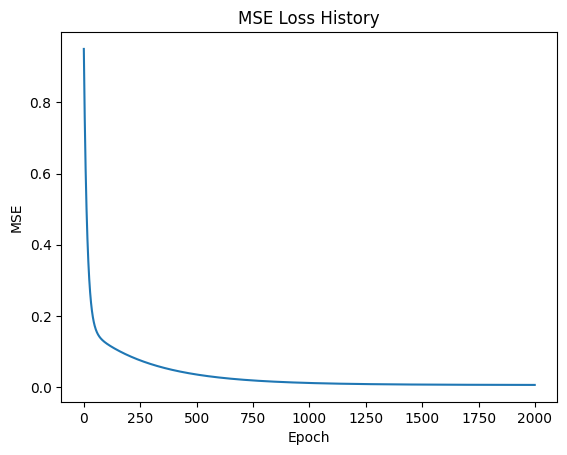

In [132]:
import matplotlib.pyplot as plt



plt.plot(loss_history)

plt.title("MSE Loss History")

plt.xlabel('Epoch')

plt.ylabel('MSE')

plt.show()

Pada grafik tersebut, dapat dilihat bahwa *loss* menurun pada tiap *epoch*-nya.

## Tugas

Tugas Anda adalah membuat model klasifikasi menggunakan *multi-layer dense neural network* untuk menyelesaikan permasalahan klasifikasi pada dataset Iris. Spesifikasi model yang diinginkan adalah sebagai berikut.



*   Anda tidak diperkenankan menggunakan *layer built-in* PyTorch; semuanya harus menggunakan ***matrix multiplication*** untuk perhitungan *forward pass*.

*   Ukuran *hidden layer* (termasuk *input layer* dan *output layer*) adalah 4, 10, 20, 10, 3.

*   *Loss function* yang digunakan adalah Categorical Cross Entropy (CCE).

*   Gunakan *activation function* ReLU setelah tiap *layer* kecuali *layer* terakhir.

*   Ingat untuk menggunakan softmax setelah *layer* terakhir.

*   Implementasi *optimizer* menggunakan *mini-batch gradient descent*.

*   Implementasi Nesterov Accelerated Gradient (NAG) dengan koefisien momentum 0.9.

*Update* parameter pada Nesterov Accelerated Gradient (NAG) dapat dirumuskan:

$$v_t = \gamma v_{t-1}-\alpha \nabla_{\theta}J(\theta_{t-1} + \gamma v_{t-1})$$

$$\theta_{t}=\theta_{t-1} + v_{t}$$

Dengan penjelasan sebagai berikut.





*   $v_t$ adalah *velocity* pada iterasi ke-t.

*   $\gamma$ adalah koefisien momentum.

*   $\alpha$ adalah *learning rate*.

*   $J$ adalah *loss function*, dalam hal ini adalah CCE.

*   $\theta_{t}$ adalah parameter pada iterasi ke-t.



Inisialisasi $v$ dengan nilai $0$, dengan ukuran sama dengan $\theta$. Perhatikan bahwa matriks parameter $\theta$ di tiap *layer* harus di-*update*.




Jika Anda tertarik untuk mengetahui lebih lanjut terkait NAG, Anda dapat mengunjungi [URL](https://mitliagkas.github.io/ift6085-2019/ift-6085-lecture-6-notes.pdf) ini.

In [133]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split



iris = load_iris()



X = iris.data

y = iris.target



# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Training set size:", X_train.shape)

print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


Lengkapilah potongan kode berikut pada bagian yang ditandai dengan `# TODO`.

In [134]:
class MLPClassifier:

  def __init__(self, hidden_size_list, eps=1e-9, epochs=2000, lr=1e-4, batch_size=None, momentum=0.9):

    # WARNING: DO NOT CHANGE; FOR REPRODUCIBILITY

    torch.manual_seed(15)

    # size of hidden layers, including input and output

    self.hidden_size_list = hidden_size_list

    # list of trainable parameters (for each layer)

    self.weights = []

    # small constant to prevent division by zero in computing CCE

    self.eps = eps

    # number of iterations

    self.epochs = epochs

    # learning rate

    self.lr = lr

    # if batch_size = None, then use batch gradient descent

    self.batch_size = batch_size

    # momentum coefficient

    self.momentum = momentum

    # list of NAG velocities (for each layer)

    self.velocities = []



  def _init_weights(self):

    # modify first hidden layer to include bias

    hids = self.hidden_size_list

    hids[0] += 1

    for i in range(len(hids)-1):

      row_size = hids[i]

      col_size = hids[i+1]

      # initialize using Glorot initialization

      # read this for more info: https://pytorch.org/docs/stable/_modules/torch/nn/init.html#xavier_uniform_

      init = torch.nn.init.xavier_uniform_(torch.empty(row_size, col_size))

      self.weights.append(torch.nn.Parameter(init, requires_grad=True))

      self.velocities.append(torch.zeros_like(init))



  def fit(self, X_train, y_train):

    if X_train.shape[1] != self.hidden_size_list[0]:

      raise RuntimeError('The size of the first layer and the number of features mismatch.')

    if len(set(y_train)) != self.hidden_size_list[-1]:

      raise RuntimeError('The size of the last layer and the number of output classes mismatch.')

    if self.batch_size == None:

      # batch GD

      self.batch_size = X_train.shape[0]



    # weights initialization and tensor conversion

    self._init_weights()

    X_train = torch.tensor(X_train, dtype=torch.float32)

    y_train = torch.tensor(y_train, dtype=torch.long)



    # modify X_train to include bias using vector of ones

    ones = torch.ones(X_train.shape[0], 1)

    X_train = torch.cat((X_train, ones), dim=1)



    # convert to one hot encoding

    y_train = torch.nn.functional.one_hot(y_train, num_classes=self.hidden_size_list[-1])



    # training

    for i in range(self.epochs):

      # shuffle data (must be consistent between X and y)

      # for mini-batch or stochastic gradient descent

      # not affecting batch gradient descent

      indices = torch.randperm(X_train.shape[0])

      X_train = X_train[indices]

      y_train = y_train[indices]



      # TODO: Lakukan iterasi mini-batch gradient descent

      for j in range(0, X_train.shape[0], self.batch_size):
        X_batch = X_train[j:j+self.batch_size]
        y_batch = y_train[j:j+self.batch_size]

        # Forward pass with lookahead weights
        lookahead_weights = [w + self.momentum * v for w, v in zip(self.weights, self.velocities)]
        y_pred = self._forward(X_batch)

        # Compute loss
        loss = self._cceloss(y_pred, y_batch)

        # Backpropagation (Manual gradients computation)
        grads = torch.autograd.grad(loss, lookahead_weights, retain_graph=True)

        # Update velocities and weights using NAG
        for l in range(len(self.weights)):
            self.velocities[l] = self.momentum * self.velocities[l] - self.lr * grads[l]
            self.weights[l] = self.weights[l] + self.velocities[l]
    
        # if i % 100 == 0:
        #         print(f'Epoch {i}, Loss: {loss.item()}')


      # progress

      if i % 100 == 0:

        print(f'Iteration: {i}, Loss: {loss}')



  def _softmax(self, x):

    # TODO: Implementasi softmax

    exps = torch.exp(x - torch.max(x))  # Subtract max for numerical stability
    return exps / torch.sum(exps, dim=1, keepdim=True)



  def _cceloss(self, y_pred, y_true):

    # TODO: Implementasi CCE loss

    y_pred = torch.clamp(y_pred, min=self.eps, max=1.0 - self.eps)  # Prevent log(0)
    return -torch.sum(y_true * torch.log(y_pred)) / y_pred.shape[0]



  def _forward(self, X):

    # TODO: Lakukan forward propagation

    return None



  def _relu(self, X):

    # TODO: Implementasi ReLU

    return torch.max(torch.tensor(0.0), X)



  def predict(self, X_test):

    # TODO: Implementasi fungsi untuk prediksi dari suatu dataset

    # Output dari fungsi ini adalah class yang diprediksi, yakni 0, 1, atau 2

    # Anda dapat menggunakan fungsi torch.argmax()

    X_test = torch.tensor(X_test, dtype=torch.float32)
    # Tambahkan bias pada input test
    ones = torch.ones(X_test.shape[0], 1)
    X_test = torch.cat((X_test, ones), dim=1)
    # Lakukan forward propagation
    y_pred = self._forward(X_test)
    # Prediksi class (0, 1, atau 2)
    return torch.argmax(y_pred, dim=1)

In [ ]:
# revisi koreksi inaya 4-11
# grad descent with momentum
# Hyperparameters
NUM_EPOCHS = 2000
LR = 1e-2
MOMENTUM = 0.9

# Initialize velocity
velocity = torch.zeros_like(W)

loss_history = []

for i in range(NUM_EPOCHS):
    # Nesterov look-ahead step: compute the gradient at the look-ahead position
    with torch.no_grad():
        W_lookahead = W - MOMENTUM * velocity

    # Make predictions using the look-ahead weights
    pred_i = W_lookahead @ X_train.t()
    
    # Compute the loss
    loss = mse(pred_i, y_train)
    loss_history.append(loss.item())

    # Print progress every 50 iterations
    if i % 50 == 0:
        print(f'Iteration: {i}, Loss: {loss.item()}')

    # Compute gradients of the loss w.r.t. W (using look-ahead weights)
    loss.backward()

    # Update velocity and apply it to weights with learning rate and momentum
    with torch.no_grad():
        # Compute the velocity update
        velocity = MOMENTUM * velocity + LR * W.grad
        
        # Update the weights using NAG
        W -= velocity

        # Zero out the gradients for the next iteration
        W.grad.zero_()


*koreksi inaya 4-11*


Velocity represents the ball's speed and direction. As you push it, the ball starts to roll and gains speed in a particular direction, which it retains over time. If you encounter a small hill (change in gradient), the ball doesn't immediately stop but continues in the general direction it's been pushed.


Momentum is a factor that determines how much the ball's current speed should depend on its past speed. High momentum (close to 1) means the ball keeps a lot of its past speed, helping it roll over small obstacles. Low momentum (close to 0) means it mostly relies on the current push (gradient) without much influence from the past.

In standard momentum-based gradient descent, the gradient is calculated at the current position of the parameters, and then the parameters are updated by moving in the direction of the accumulated momentum (velocity).


In NAG, we first “look ahead” in the direction of the accumulated momentum (like taking a small predictive step) before calculating the gradient. This means that the gradient is computed based on an anticipated position, not the current position.

Setelah melengkapi kode di atas, jalankan eksperimen sesuai dengan kondisi-kondisi yang diberikan berikut untuk membandingkan performa batch, mini-batch, dan stochastic gradient descent, dengan dan tanpa Nesterov's momentum.





*   Batch gradient descent tanpa momentum

*   Batch gradient descent dengan momentum ($\gamma=0.9$)

*   Mini-batch gradient descent (batch size = 12) tanpa momentum

*   Mini-batch gradient descent (batch size = 12) dengan momentum ($\gamma=0.9$)

*   Stochastic gradient descent tanpa momentum

*   Stochastic gradient descent dengan momentum ($\gamma=0.9$)



Semua konfigurasi eksperimen yang lain (*epochs*, *learning rate*, dll.) bebas ditentukan oleh Anda sendiri. Akan tetapi, pastikan bahwa semua eksperimen menggunakan konfigurasi yang sama. Sebagai contoh, jika Anda menentukan jumlah iterasi yang digunakan adalah 100, maka pastikan semua eksperimen tersebut menggunakan 100 iterasi.




In [135]:
# TODO: Eksperimen dengan menggunakan 6 kondisi di atas
import torch
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the Iris dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = None  # Will be set dynamically
momentum = 0.0  # Will be set dynamically for momentum cases

# Define the hidden layer sizes
hidden_size_list = [4, 10, 20, 10, 3]

# Define a function to run an experiment
def run_experiment(batch_size, momentum):
    print(f"Running experiment with batch_size={batch_size}, momentum={momentum}")

    # Initialize MLPClassifier model
    model = MLPClassifier(hidden_size_list=hidden_size_list, 
                          epochs=epochs, 
                          lr=learning_rate, 
                          batch_size=batch_size, 
                          momentum=momentum)
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    return y_pred
    # # Calculate accuracy
    # accuracy = accuracy_score(y_test, y_pred.numpy())  # Convert torch tensor to numpy array for accuracy calculation
    
    # print(f"Accuracy: {accuracy}")
    # return accuracy

# Experiments
results = {}

# 1. Batch Gradient Descent tanpa momentum
results[1] = run_experiment(batch_size=X_train.shape[0], momentum=0.0)

# 2. Batch Gradient Descent dengan momentum
results[2] = run_experiment(batch_size=X_train.shape[0], momentum=0.9)

# 3. Mini-batch Gradient Descent (batch size = 12) tanpa momentum
results[3] = run_experiment(batch_size=12, momentum=0.0)

# 4. Mini-batch Gradient Descent (batch size = 12) dengan momentum
results[4] = run_experiment(batch_size=12, momentum=0.9)

# 5. Stochastic Gradient Descent (batch size = 1) tanpa momentum
results[5] = run_experiment(batch_size=1, momentum=0.0)

# 6. Stochastic Gradient Descent (batch size = 1) dengan momentum
results[6] = run_experiment(batch_size=1, momentum=0.9)


Running experiment with batch_size=120, momentum=0.0


RuntimeError: mat1 and mat2 shapes cannot be multiplied (120x5 and 4x10)

Evaluasi hasil klasifikasi keenam eksperimen tersebut dengan metrik akurasi. Gunakan data *test* sesuai yang telah di-*split* sebelumnya (`X_test` dengan ground truth `y_test`). Berikan sedikit penjelasan terkait hasil klasifikasi tersebut, apakah sesuai ekspektasi Anda dengan mempertimbangkan *loss*-nya? Anda dapat menggunakan `accuracy_score` untuk menghitung skor akurasi.

In [ ]:
# TODO: Evaluasi akurasi

from sklearn.metrics import accuracy_score


def calc_accuracy(y_test=y_test, y_pred, key):
    accuracy = accuracy_score(y_test, y_pred.numpy())  # Convert torch tensor to numpy array for accuracy calculation
    
    print(f"Accuracy {key}: {accuracy}")
    return accuracy

for i,j in results.items():
    calc_accuracy(j, i)


Jelaskan apa yang bisa Anda dapatkan dari percobaan tersebut! Tentukan metode apa yang menurut Anda memiliki performa yang paling baik, jelaskan alasan Anda memilih metode tersebut, dan jelaskan mengapa metode tersebut memberikan performa yang paling baik.





> TODO: Jawab pertanyaan tersebut


